In [55]:
dataset='/content/drive/MyDrive/ALML DataSets/outbreak_detect.csv'

import pandas as pd
df=pd.read_csv(dataset)

In [56]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,No
1,34,23,83.27,15.22,10717,677,Yes
2,40,23,50.74,0.00,1257,127,No
3,34,24,59.16,9.06,4198,211,No
4,34,27,73.23,0.00,11808,712,Yes


In [57]:
count=df.shape[0] # to get count of records
count

23

In [58]:
#doing label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Outbreak']=label_encoder.fit_transform(df['Outbreak'])

In [7]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,0
1,34,23,83.27,15.22,10717,677,1
2,40,23,50.74,0.00,1257,127,0
3,34,24,59.16,9.06,4198,211,0
4,34,27,73.23,0.00,11808,712,1


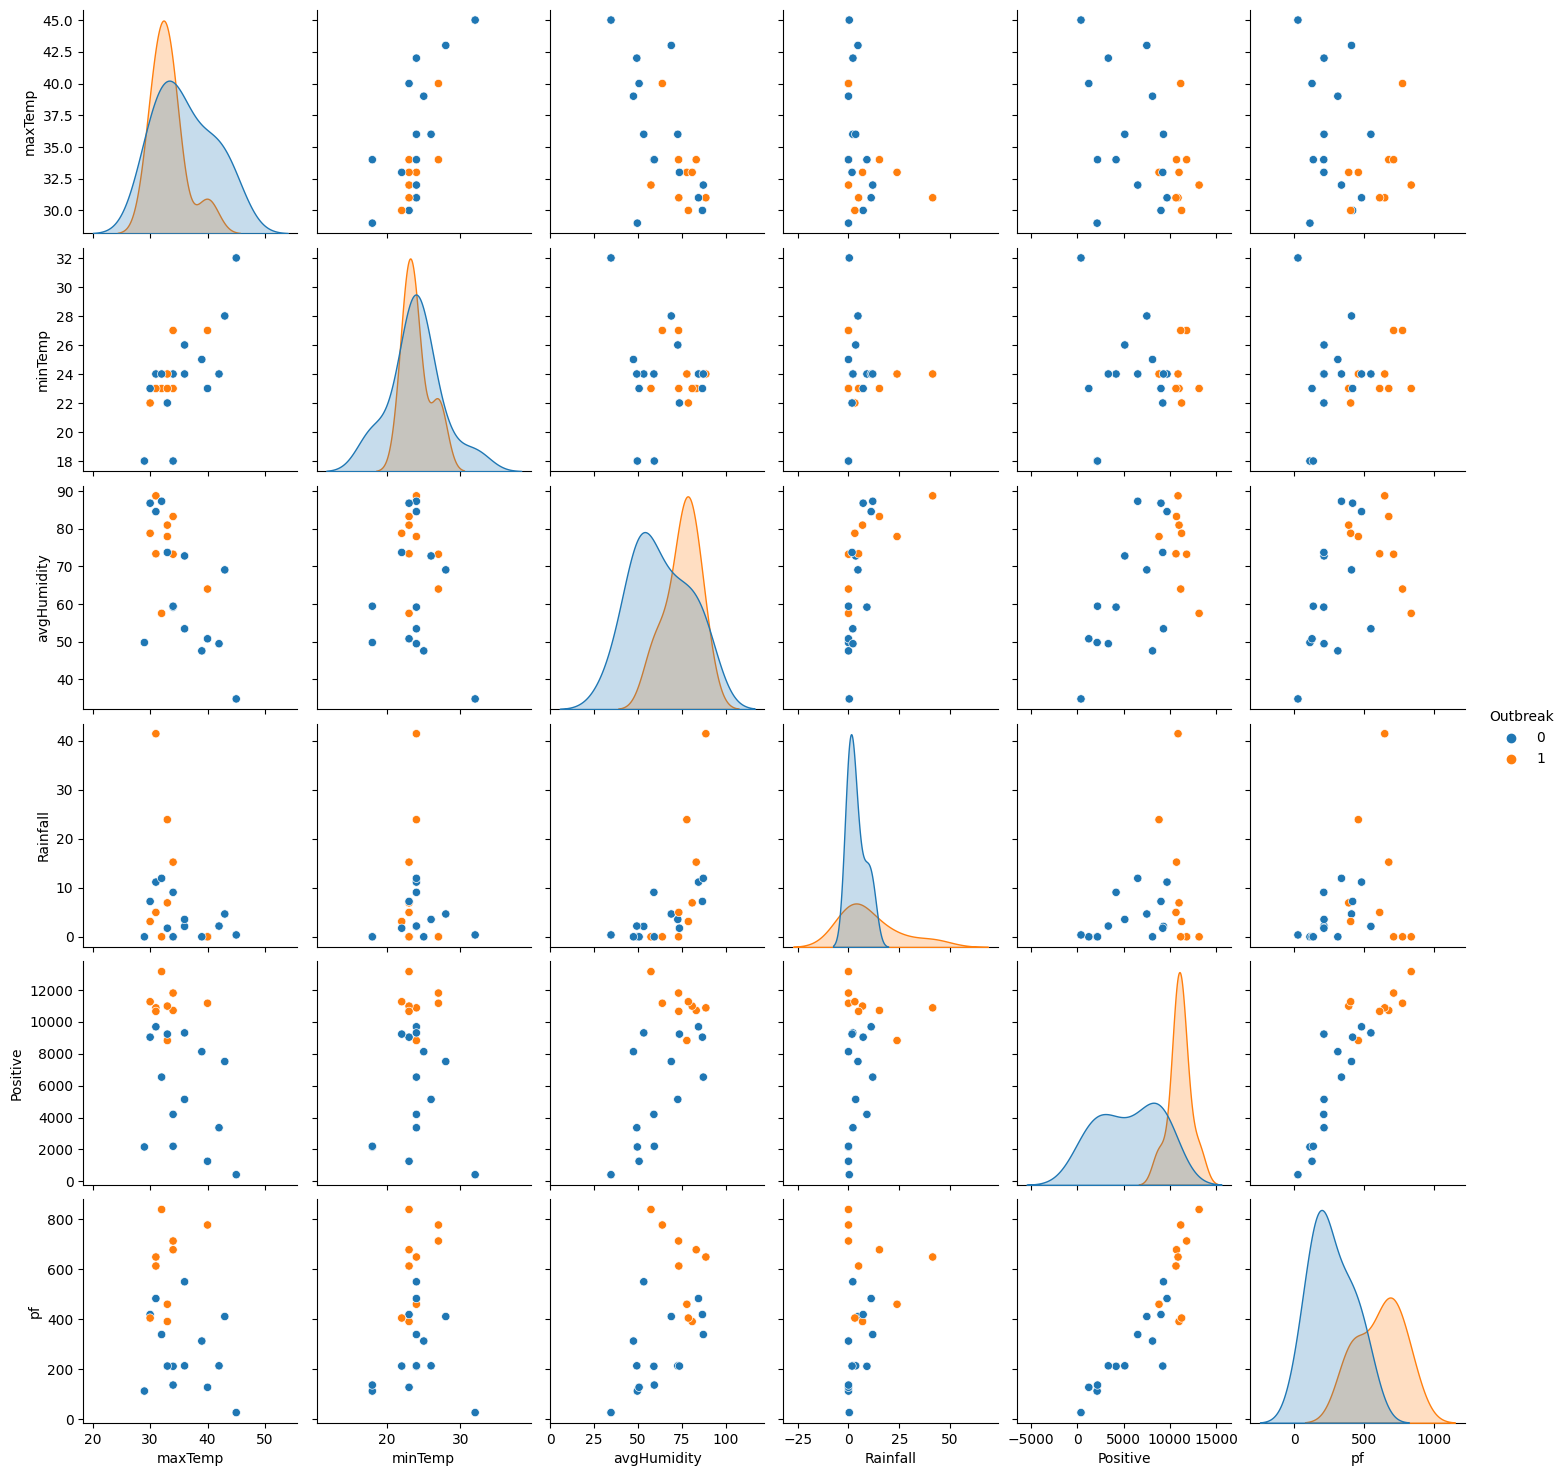

In [10]:
import seaborn as sns
data=df[['maxTemp','minTemp','avgHumidity','Rainfall','Positive','pf','Outbreak']]
sns.pairplot(data,hue='Outbreak')

<Axes: >

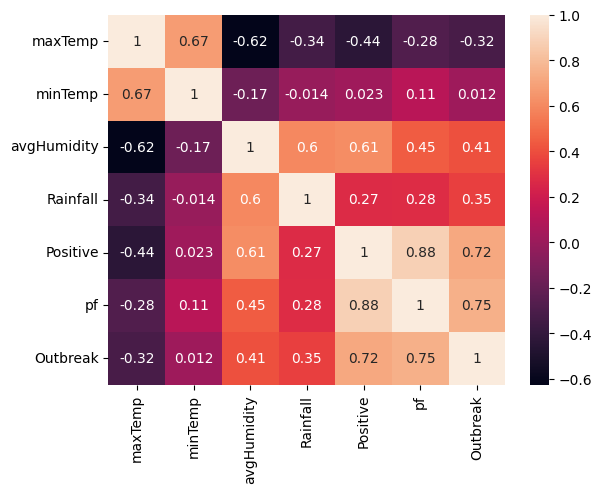

In [11]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Outbreak', ylabel='pf'>

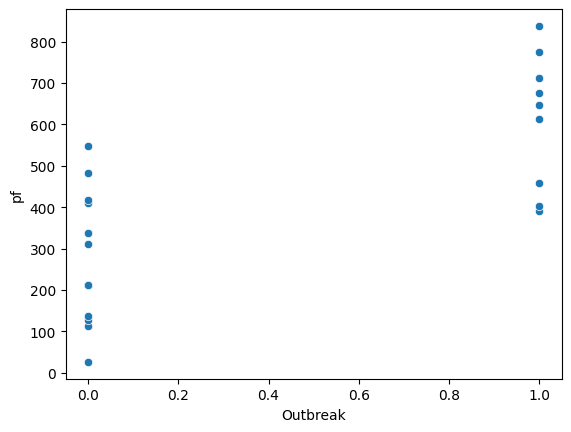

In [59]:
sns.scatterplot(data=data,x='Outbreak',y='pf')

In [70]:
X=(df.drop('Outbreak',axis=1))

In [71]:
X

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
0,29,18,49.74,0.00,2156,112
1,34,23,83.27,15.22,10717,677
2,40,23,50.74,0.00,1257,127
3,34,24,59.16,9.06,4198,211
4,34,27,73.23,0.00,11808,712
5,31,24,88.77,41.40,10881,648
6,33,24,77.94,23.88,8830,459
7,31,24,84.57,11.15,9693,482
8,36,24,53.40,2.12,9310,549
9,32,23,57.50,0.00,13154,838


In [72]:
Y=df['Outbreak']

In [73]:
Y

0     0
1     1
2     0
3     0
4     1
5     1
6     1
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    0
18    0
19    1
20    0
21    1
22    0
Name: Outbreak, dtype: int64

In [74]:
#Splitting up the data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [75]:
X_train

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
1,34,23,83.27,15.22,10717,677
13,43,28,69.07,4.65,7514,410
22,33,22,73.71,1.75,9233,212
16,40,27,63.97,0.00,11169,776
8,36,24,53.40,2.12,9310,549
6,33,24,77.94,23.88,8830,459
17,39,25,47.52,0.00,8131,312
4,34,27,73.23,0.00,11808,712
2,40,23,50.74,0.00,1257,127
5,31,24,88.77,41.40,10881,648


In [76]:
#Train the model

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [77]:
print("Model Score Accuracy on test data")
model.score(X_test,Y_test)*100

Model Score Accuracy on test data


60.0

In [78]:
print("Model Score Accuracy on Train Data")
model.score(X_train,Y_train)*100

Model Score Accuracy on Train Data


94.44444444444444

In [79]:
print("Model Score Accuracy on Actual Data")
X=scaler.transform(X)
model.score(X,Y)*100

Model Score Accuracy on Actual Data


86.95652173913044

In [ ]:
#Confusion Matrix
